In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Value counts 
(dataset == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

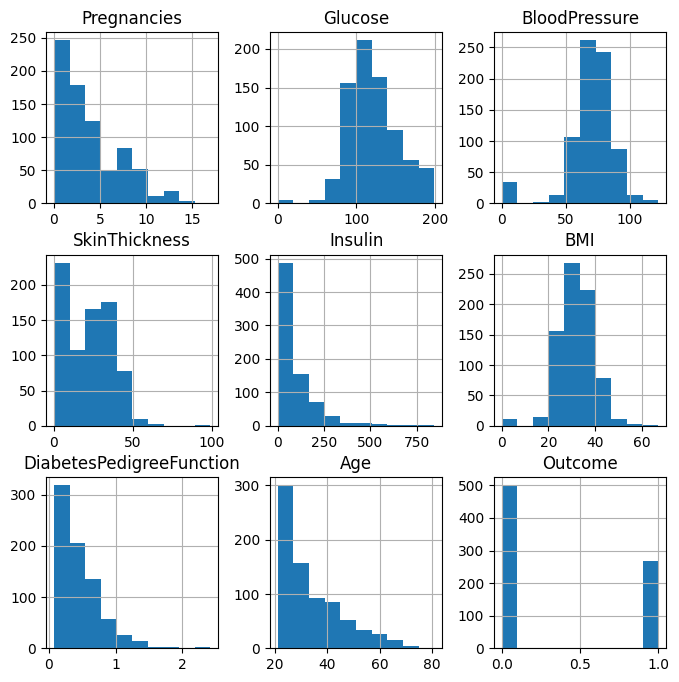

In [8]:
dataset.hist(figsize=(8,8))
plt.show()


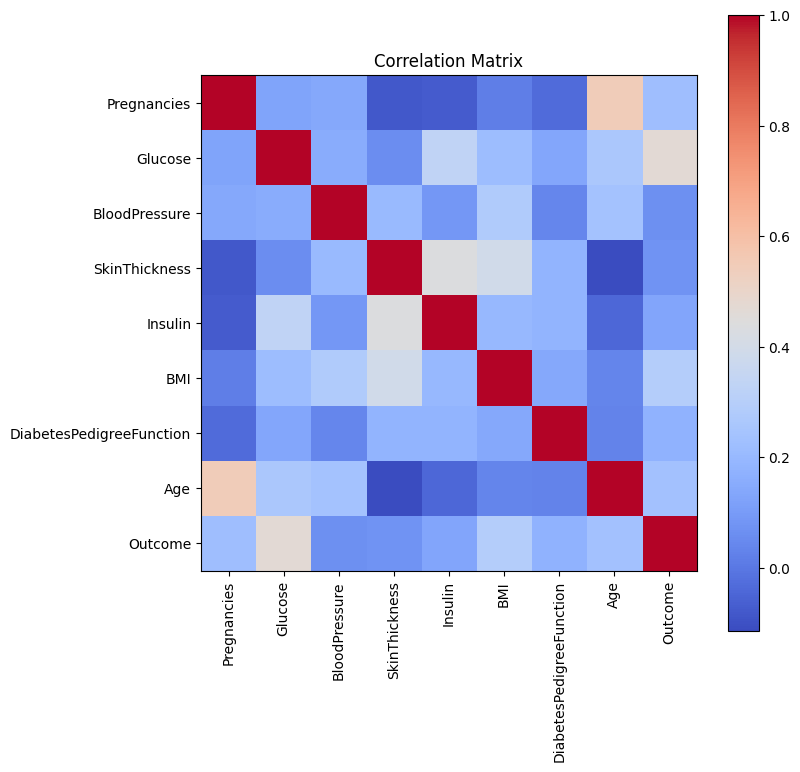

In [9]:
# Correkation mattrix
corr_matrix = dataset.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix')
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# Replace 0 values with mean
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mean())
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())



In [11]:
# Filtering the dataset to include only individuals under 40 years old
dataset = dataset[dataset['Age'] < 40]

# Separating the features and target variable
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [14]:
# Fitting the K-NN  to the training dataset
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [15]:
# Predicting the test set results
y_pred = classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [16]:
print(y_test)

685    0
550    0
98     0
449    0
316    0
      ..
83     0
198    1
89     0
7      0
11     1
Name: Outcome, Length: 169, dtype: int64


In [17]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.80


Confusion Matrix:
[[120   7]
 [ 27  15]] 


------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       127
           1       0.68      0.36      0.47        42

    accuracy                           0.80       169
   macro avg       0.75      0.65      0.67       169
weighted avg       0.78      0.80      0.77       169



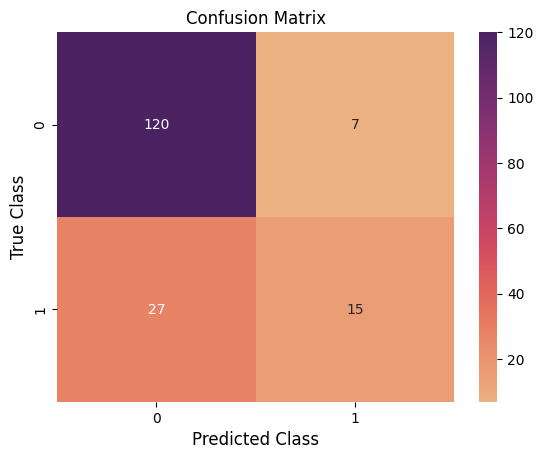

In [18]:
ax = sns.heatmap(cm, cmap='flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)

plt.show()

In [21]:
# Calculate below metrics on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Precision: 0.6818181818181818
Recall: 0.35714285714285715
F1-score: 0.46875000000000006
AUC-ROC: 0.6510123734533183
